<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 3: Fitting and `LMFIT` Software

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 3.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- Fitting with the software package `LMFIT`
- A second `LMFIT` example
- Fitting with complicated models, like project 1
- How to interpret bugs using `LMFIT`

<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 3.1 Using `LMFIT` to fit to data

To get some practice fitting, suppose you have some data coming from the function $y=2x$. We'll fit a model function of $y=mx+b$

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Let's generate some example data with made-up systematic uncertainties. These uncertainties are assumed to be the standard deviations of normal distributions (a common assumption). Therefore, we draw each data point $y_i$ from a normal distribution with standard deviation equal to the uncertainty of point $i$ and mean $2 x_i$.

<!--
#initial code
import numpy as np

np.random.seed(421421)

xi = np.array([2,3,4,5,6,7])
yi = 2*xi

y_unc = np.array([0.3, 0.4, 0.45, 0.35, 0.6, 0.5])
yi = yi + np.random.randn(len(xi))*y_unc
-->

<!--end-block-->

In [1]:
import numpy as np

np.random.seed(421421)

xi = np.array([2,3,4,5,6,7])
yi = 2*xi

y_unc = np.array([0.3, 0.4, 0.45, 0.35, 0.6, 0.5])
yi = yi + np.random.randn(len(xi))*y_unc

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Plot the data and its error bars.

<!--
#initial code
import matplotlib.pyplot as plt

#your code here
-->

<!--
#solution
import matplotlib.pyplot as plt

plt.scatter(xi, yi)
plt.errorbar(xi, yi, yerr=y_unc, linestyle='none')
plt.plot(xi, 2 * xi);
-->

In [2]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

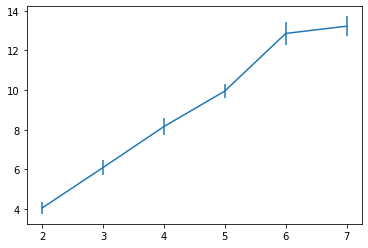

In [3]:
plt.errorbar(xi,yi,y_unc)

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

We'll make a model using `LMFIT` to represent the data. Models can either be selected from a [large list of functions](https://lmfit.github.io/lmfit-py/builtin_models.html) already set up by `LMFIT`, or you can make them yourself. Here we use a preset linear model.

<!--
#initial code
from lmfit.models import LinearModel
model = LinearModel()
-->

<!--end-block-->

In [4]:
from lmfit.models import LinearModel
model = LinearModel()

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

In tomorrow's lecture, you'll learn about the math behind fitting. But for now, let's let `LMFIT` black box it for us. Just know that `LMFIT` is doing a minimization algorithm behind the scenes.

<b>Important:</b> set the weights equal to one over the systematic uncertainty. Not the uncertainty itself, and not the variance.

<!--
#initial code
result = model.fit(yi, x=xi, weights=1/yerr);

print(result.fit_report())
-->

<!--end-block-->

In [5]:
result = model.fit(yi, x=xi, weights=1/y_unc);

print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 4.23466092
    reduced chi-square = 1.05866523
    Akaike info crit   = 1.90926274
    Bayesian info crit = 1.49278168
[[Variables]]
    slope:      1.93632021 +/- 0.10004787 (5.17%) (init = 1)
    intercept:  0.27253202 +/- 0.42745210 (156.84%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.919


<!--start-block-->

Look in the `Variables` section: we have a slope of about 2 and an intercept of about zero, consistent with the true model! Very helpfully, `LMFIT` also gives you uncertainties on the fit parameters. You'll learn how `LMFIT` does this tomorrow, as well as what the `chi-square` and `reduced chi-square` entries are.

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

There's one more thing to do: it's always a good idea to verify that your model actually fits your data. So let's plot the data together with the model.

<!--
#initial code
result.plot();
-->

<!--end-block-->

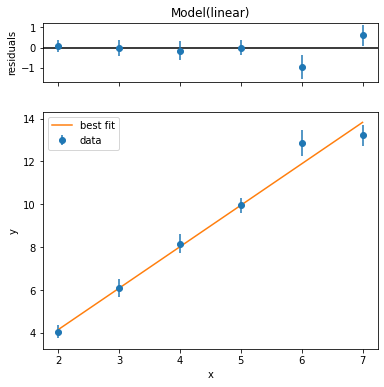

In [6]:
result.plot();

<!--start-block-->

You can see that the model fits the data very well in the bottom plot, and the top plot demonstrates that deviations of the data from the model are random; they don't seem correlated with $x$ nor with each other. This is a good thing, because `LMFIT` assumed that the data points were uncorrelated with each other when performing the fit.


<!--end-block-->

<!--start-block-->

<hr style="height: 1px;">

## 3.2 Another `LMFIT` example

Fitting using a pre-determined model is all well and good, but how do you fit to data using your own model function?

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Let's arbitrarily choose the function
$$f(x) = \frac{\cos(kx)}{x^a}$$
as our model, with free parameters $k > 0$ and $a > 0$.

<!--
#initial code
import numpy as np

def model_fn(x, k, a):# independent variable must be first argument
    return np.cos(k * x) / x**a
-->

<!--end-block-->

In [7]:
import numpy as np

def model_fn(x, k, a):# independent variable must be first argument
    return np.cos(k * x) / x**a

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Generate some synthetic data using this model function, with 20 $x$ coordinates spaced evenly in $(0.1, \pi]$. Use true values of $k=\pi$ and $a=1$.

Generate systematic uncertainty from a uniformly random distribution in the range $[0.1, 0.5]$ (`np.random.random()`). Assume that this uncertainty is the standard deviation of a normal distribution for the sake of randomizing your data (`np.random.randn()`).

<!--
#initial code
import numpy as np
np.random.seed(2345789)

TRUE_K = np.pi
TRUE_A = 1

x = np.linspace(-4 * np.pi, 4 * np.pi, 20)
y = #your code here
yerr = #your code here
-->

<!--
#solution
import numpy as np
np.random.seed(2345789)

TRUE_K = np.pi
TRUE_A = 1

x = np.linspace(0.1, np.pi, 20)
y = model_fn(x, TRUE_K, TRUE_A)

y_unc = 0.1 + 0.4 * np.random.random(len(x))
y = y + np.random.randn(len(x)) * y_unc;
-->

In [20]:
import numpy as np
np.random.seed(2345789)

TRUE_K = np.pi
TRUE_A = 1

x = np.linspace(0.1, np.pi, 20)
y = model_fn(x, TRUE_K, TRUE_A)
yerr = 0.4 * np.random.random(20) + 0.1
y = y + yerr

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Now plot your data with error bars and the true function to ensure they match.
<!--
#initial code
import matplotlib.pyplot as plt

#your code here
-->

<!--
#solution
import numpy as np
import matplotlib.pyplot as plt

plt.errorbar(x, y, y_unc, linestyle='none')
plt.plot(x, model_fn(x, TRUE_K, TRUE_A), label="true")
plt.scatter(x, y, label="data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
-->

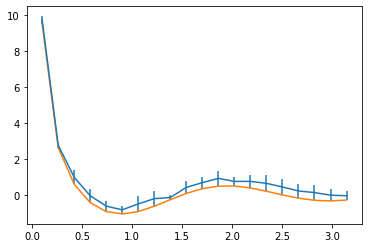

In [18]:
import matplotlib.pyplot as plt

plt.errorbar(x,y,yerr)
plt.plot(x,model_fn(x,TRUE_K,TRUE_A))

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Now we need to give this model to `LMFIT`. This involves making a `Model` object, and giving it a `Parameters` object to describe the model parameters.

Each parameter has `min`, `max`, and `value` arguments that specify the minimum allowable value, the maximum value, and the initial value respectively. None of these are required, but it's often a good idea to put them in if you expect your values to be within a certain range.

<!--
#initial code
from lmfit import Model, Parameters

model = Model(model_fn)

params = Parameters()
params.add('k', min=0, max=5, value=1)
params.add('a', min=0, max=3, value=2)
-->

<!--end-block-->

In [21]:
from lmfit import Model, Parameters

model = Model(model_fn)

params = Parameters()
params.add('k', min=0, max=5, value=1)
params.add('a', min=0, max=3, value=2)

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Finally, let's run the fit! We reuse the code from the previous example, but we have to pass `params` into the fit function this time.

<!--
#initial code
result = model.fit(y, params, x=x, weights=1/yerr);

print(result.fit_report())

result.plot();
-->

<!--end-block-->

In [22]:
result = model.fit(y, params, x=x, weights=1/y_unc);

print(result.fit_report())

result.plot();

ValueError: operands could not be broadcast together with shapes (20,) (6,) (20,) 

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Do your fit results agree with the true values? Which was determined with higher precision: $k$ or $a$? Does this make sense given your knowledge of the model function and the systematic uncertainty?

<!--
#solution
They do agree. $a$ can be fitted with higher precision because it controls the height of the first data point very precisely; a small change in $a$ will change the height of the first data point dramatically. However, $k$ is dominated by the data points at large $x$, which have small $y$ values compared to their error bars.
-->


<br>
<!--end-block-->

<!--start-block-->

<hr style="height: 1px;">

## 3.3 Complicated models

You'll be using `LMFIT` for project 1 on a complicated gravitational wave model. This section is designed to grapple with some of the same challenges you'll grapple with in project 1, so that you have some practice.

We'll look at a fit model which is similar to a black hole merger waveform.

<!--end-block-->

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Below is a complicated model function with six parameters. Add code to generate true data from the function and store it as true_yi (do not include any systematic uncertainties). Then plot your data to see what the waveform looks like. Do you see the similarity to a black hole merger?

<!--
#initial code
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0x98a09fe)

def complicated_model_fn(x, lambda_plus, lambda_minus, max_amp, omega_0, omega_max, omega_sigma):
    omega = (omega_max - omega_0) * (np.exp(-np.minimum(x, 0)**2 / omega_sigma)) + omega_0
    lambdas = np.array([lambda_plus if xvalue > 0 else lambda_minus for xvalue in x])
    amplitude = max_amp * np.exp(-abs(x) / lambdas)
    return amplitude * np.cos(omega * x)

LAMBDA_PLUS_TRUE = 1.0
LAMBDA_MINUS_TRUE = 4
MAX_AMP_TRUE = 1.2
OMEGA_0_TRUE = 3.0
OMEGA_MAX_TRUE = 6.0
OMEGA_SIGMA_TRUE = 4.0

xi = np.linspace(-15, 5, 200)
true_yi = # your code here

# your plotting code here
-->

<!--
#solution
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0x98a09fe)

def complicated_model_fn(x, lambda_plus, lambda_minus, max_amp, omega_0, omega_max, omega_sigma):
    omega = (omega_max - omega_0) * (np.exp(-np.minimum(x, 0)**2 / omega_sigma)) + omega_0
    lambdas = np.array([lambda_plus if xvalue > 0 else lambda_minus for xvalue in x])
    amplitude = max_amp * np.exp(-abs(x) / lambdas)
    return amplitude * np.cos(omega * x)

LAMBDA_PLUS_TRUE = 1.0
LAMBDA_MINUS_TRUE = 4
MAX_AMP_TRUE = 1.2
OMEGA_0_TRUE = 3.0
OMEGA_MAX_TRUE = 6.0
OMEGA_SIGMA_TRUE = 4.0

xi = np.linspace(-15, 5, 200)
true_yi = complicated_model_fn(xi, LAMBDA_PLUS_TRUE, LAMBDA_MINUS_TRUE, MAX_AMP_TRUE, OMEGA_0_TRUE,
                                   OMEGA_MAX_TRUE, OMEGA_SIGMA_TRUE)

plt.plot(xi, true_yi)
plt.xlabel("Time (s)")
plt.ylabel("Strain");
-->

<!--end-block-->

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0x98a09fe)

def complicated_model_fn(x, lambda_plus, lambda_minus, max_amp, omega_0, omega_max, omega_sigma):
    omega = (omega_max - omega_0) * (np.exp(-np.minimum(x, 0)**2 / omega_sigma)) + omega_0
    lambdas = np.array([lambda_plus if xvalue > 0 else lambda_minus for xvalue in x])
    amplitude = max_amp * np.exp(-abs(x) / lambdas)
    return amplitude * np.cos(omega * x)

LAMBDA_PLUS_TRUE = 1.0
LAMBDA_MINUS_TRUE = 4
MAX_AMP_TRUE = 1.2
OMEGA_0_TRUE = 3.0
OMEGA_MAX_TRUE = 6.0
OMEGA_SIGMA_TRUE = 4.0

xi = np.linspace(-15, 5, 200)
true_yi = # your code here

# your plotting code here

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Now we add noise to the data, but not by individually moving data points like we did in the past. To better imitate the LIGO project, we'll add low-amplitude sine waves at different frequencies immitating different noises.

Note: this will mean that uncertainties on each data point are actually correlated, which violates the assumptions `LMFIT` uses to perform the fit. However, this problem is too complicated for us to handle now, so we ignore it.

<!--
#initial code
NUMBER_SINES_TO_ADD = 10

noise_frequencies = 0.5 + 7 * np.random.random(NUMBER_SINES_TO_ADD)
noise_phases = 2 * np.pi * np.random.random(NUMBER_SINES_TO_ADD)
noise_amplitudes = 2 * MAX_AMP_TRUE / NUMBER_SINES_TO_ADD * np.random.random(NUMBER_SINES_TO_ADD)
    # The above line sets noise amplitudes so that the sum of all the noise amplitudes is on average
    # equal to the maximum amplitude of the signal.

yi = true_yi.copy()# yi contains the data

for freq, phase, amplitude in zip(noise_frequencies, noise_phases, noise_amplitudes):
    yi += amplitude * np.sin(phase + freq * xi)

plt.plot(xi, yi, label='Data')
plt.plot(xi, true_yi, label='True')
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend();
-->

<!--end-block-->

In [ ]:
NUMBER_SINES_TO_ADD = 10

noise_frequencies = 0.5 + 7 * np.random.random(NUMBER_SINES_TO_ADD)
noise_phases = 2 * np.pi * np.random.random(NUMBER_SINES_TO_ADD)
noise_amplitudes = 2 * MAX_AMP_TRUE / NUMBER_SINES_TO_ADD * np.random.random(NUMBER_SINES_TO_ADD)
    # The above line sets noise amplitudes so that the sum of all the noise amplitudes is on average
    # equal to the maximum amplitude of the signal.

yi = true_yi.copy()# yi contains the data

for freq, phase, amplitude in zip(noise_frequencies, noise_phases, noise_amplitudes):
    yi += amplitude * np.sin(phase + freq * xi)

plt.plot(xi, yi, label='Data')
plt.plot(xi, true_yi, label='True')
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend();

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Make an `LMFIT` model and parameters for this function.

<!--
#initial code
from lmfit import Model, Parameters

model = Model(complicated_model_fn)

params = Parameters()
params.add('lambda_plus', min=0.1, max=5, value=1.1)
params.add('lambda_minus', min=0.1, max=5, value=1)
params.add('max_amp', min=0, max=2, value=1)
params.add('omega_0', min=0, max=5, value=1)
params.add('omega_max', min=0, max=10, value=1)
params.add('omega_sigma', min=0, max=5, value=1)
-->

<!--end-block-->

In [ ]:
from lmfit import Model, Parameters

model = Model(complicated_model_fn)

params = Parameters()
params.add('lambda_plus', min=0.1, max=5, value=1.1)
params.add('lambda_minus', min=0.1, max=5, value=1)
params.add('max_amp', min=0, max=2, value=1)
params.add('omega_0', min=0, max=5, value=1)
params.add('omega_max', min=0, max=10, value=1)
params.add('omega_sigma', min=0, max=5, value=1)

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Using the `model` and `params` variables you made above, fit to the waveform signal. Do not include a weights argument; this will set the uncertainties on all data points equal to each other. Remember to plot the result.

<!--
#initial code
#your code here
-->

<!--
#solution
result = model.fit(yi, params, x=xi)
print(result.fit_report())
result.plot()
-->

<!--end-block-->

In [ ]:
#your code here

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Are you happy with the fit?

<!--
#solution
No; we didn't recover the right parameters and the residuals are pretty large and don't really look like noise.
-->


<br>
<!--end-block-->

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Let's try to get better fit results. We'll do this by running the fit many times with different initial values and taking the best fit. This is a nice, principled way to get a good fit without knowing the true fit values. 

First, write a function that generates a new `params` varaible with initial values chosen randomly in the ranges given in the `params_max_min` dictionary.

<!--
#initial code
from lmfit import Model, Parameters

params_min_max = {
    'lambda_plus': (0.1, 5),
    'lambda_minus': (0.1, 5),
    'max_amp': (0, 2),
    'omega_0': (0, 5),
    'omega_max': (0, 10),
    'omega_sigma': (0, 5)
}
params_trues = {
    'lambda_plus': LAMBDA_PLUS_TRUE,
    'lambda_minus': LAMBDA_MINUS_TRUE,
    'max_amp': MAX_AMP_TRUE,
    'omega_0': OMEGA_0_TRUE,
    'omega_max': OMEGA_MAX_TRUE,
    'omega_sigma': OMEGA_SIGMA_TRUE
}

def get_params():
    #your code here
-->

<!--
#solution
from lmfit import Model, Parameters

params_min_max = {
    'lambda_plus': (0.1, 5),
    'lambda_minus': (0.1, 5),
    'max_amp': (0, 2),
    'omega_0': (0, 5),
    'omega_max': (0, 10),
    'omega_sigma': (0, 5)
}
params_trues = {
    'lambda_plus': LAMBDA_PLUS_TRUE,
    'lambda_minus': LAMBDA_MINUS_TRUE,
    'max_amp': MAX_AMP_TRUE,
    'omega_0': OMEGA_0_TRUE,
    'omega_max': OMEGA_MAX_TRUE,
    'omega_sigma': OMEGA_SIGMA_TRUE
}

def get_params():
    params = Parameters()
    for p, (p_min, p_max) in params_min_max.items():
        value = p_min + (p_max - p_min) * np.random.random(1)
        params.add(p, min=p_min, max=p_max, value=v
    return params
-->

<!--end-block-->



In [ ]:
from lmfit import Model, Parameters

params_min_max = {
    'lambda_plus': (0.1, 5),
    'lambda_minus': (0.1, 5),
    'max_amp': (0, 2),
    'omega_0': (0, 5),
    'omega_max': (0, 10),
    'omega_sigma': (0, 5)
}
params_trues = {
    'lambda_plus': LAMBDA_PLUS_TRUE,
    'lambda_minus': LAMBDA_MINUS_TRUE,
    'max_amp': MAX_AMP_TRUE,
    'omega_0': OMEGA_0_TRUE,
    'omega_max': OMEGA_MAX_TRUE,
    'omega_sigma': OMEGA_SIGMA_TRUE
}

def get_params():
    #your code here

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Now we write a function that fits using these random parameters, returning the chi squared value and the fit result.

<!--
#initial code
def fit(empty_arg):
    model = Model(complicated_model_fn)
    params = get_params()
    result = model.fit(yi, params, x=xi)
    return result.chisqr, result
-->

<!--end-block-->



In [ ]:
def fit(empty_arg):
    model = Model(complicated_model_fn)
    params = get_params()
    result = model.fit(yi, params, x=xi)
    return result.chisqr, result

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Using the `multiprocessing` module to parallelize the operation and make it faster, we perform this fit with different parameters 50 times and store the results for all 50 in the results array.

<!--
#initial code
from multiprocessing import Pool

NUM_FITS = 50

with Pool() as pool:
    results = pool.map(fit, np.zeros(NUM_FITS))
-->

<!--end-block-->



In [ ]:
from multiprocessing import Pool

NUM_FITS = 50

with Pool() as pool:
    results = pool.map(fit, np.zeros(NUM_FITS))

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Sort the `results` array generated above by the chi squared value from lowest to highest (the chi squared value is the first element of every item in `results`).

Then, for the fit result with the lowest chi squared value (now the first element of sorted `results`), use the fact that the second element of the first item of `results` is the fit result object to print the `fit_report()` and show the `plot()`.

<!--
#initial code
#your code here
-->

<!--
#solution
results = sorted(results, key=lambda x:x[0])

print(results[0][1].fit_report())
results[0][1].plot();
-->

<!--end-block-->



In [ ]:
#your code here

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

For each parameter of the best fit result, display the true value (stored in `params_trues`), the fit value, the fit uncertainty, and the the difference between the true and fit values divided by the fit uncertainty.

<!--
#initial code
#your code here
-->

<!--
#solution
for param, info in results[0][1].params.items():
    print(f"{param}:\tTrue: {float(params_trues[param])}\tFit: {info.value} +/- {info.stderr}"+\
          f"\tSigmas: {abs(info.value - params_trues[param]) / info.stderr}")
-->

<!--end-block-->

In [ ]:
#your code here

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Are you happier with the fit now? What are some other things you might do to get an even better result?

<!--
#solution
Yes; the true values are much closer to the fit values and the residuals look better. You might improve results by:
- fitting over more initial parameters than 50
- acknowledge uncertainty correlation
- change the model function parameterization so that each parameter is more independent.
- separate the hard-to-fit-for parts of the model function from the easy-to-fit-for so that the error bars on the easy-to-fit-for parameters are small
-->


<br>
<!--end-block-->

<!--start-block-->

<hr style="height: 1px;">

## 3.4 Interpreting bugs with `LMFIT`

Let's walk through a couple common bugs you might encounter when using `LMFIT`, so you know what causes them. (These are bugs in your code, not `LMFIT`).

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

### Bug 1

Let's run the code from example 3.2, but take out the parameter limits on $k$. (Make sure you run the 3.2 blocks of code before running this one.)

<!--
#initial code
from lmfit import Model, Parameters

model = Model(model_fn)
params = Parameters()
params.add('k')
params.add('a', min=0, max=3, value=2)

result = model.fit(y, params, x=x, weights=1/y_unc);

print(result.fit_report())

result.plot();

#THROWS AN ERROR
-->

<!--end-block-->

In [ ]:
from lmfit import Model, Parameters

model = Model(model_fn)
params = Parameters()
params.add('k')
params.add('a', min=0, max=3, value=2)

result = model.fit(y, params, x=x, weights=1/y_unc);

print(result.fit_report())

result.plot();

#THROWS AN ERROR

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


What was the error? (Remember the phrase `generated NaN values`) What arguments can you add back to the $k$ parameter to fix this error?

<!--
#solution
The nan error is a signifier that either your model function is incorrect or it is being used for parameters you did not intend to use it for. By setting the initial value of k closer to the true value, you resolve the problem. This error can also happen when your parameters are degenerate, as $k$ is here; $-k$ and $k$ give the same function.
-->

<br>
<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

### Bug 2

Let's try fitting the wrong model to data. We'll generate data according to the function $f(x)=x^2$, but fit a Gaussian model instead.

<!--
#initial code
import numpy as np
from lmfit.models import GaussianModel

np.random.seed(2)

# Linear data
xi = np.array([-2, -1, 0, 1, 2])
yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6])
yi = xi**2 +yerr*np.random.normal(xi.shape)

# Gaussian model
model = GaussianModel()

results = model.fit(yi, x=xi, weights = 1/yerr);

print(results.fit_report())
-->

<!--end-block-->

In [ ]:
import numpy as np
from lmfit.models import GaussianModel

np.random.seed(2)

# Quadratic data
xi = np.array([-2, -1, 0, 1, 2])
yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6])
yi = xi**2 +yerr*np.random.normal(xi.shape)

# Gaussian model
model = GaussianModel()

results = model.fit(yi, x=xi, weights = 1/yerr);

print(results.fit_report())

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Was an error thrown? Look more closely at the fit report. What is the warning line? What does it signify?

Add the line `results.plot();` to the above block of code. Does this make it easier to diagnose the problem?

<!--
#solution
`##  Warning: uncertainties could not be estimated.` It indicates that your fit was quite bad, as do your chi squared and reduced chi-squared values. By looking at those or by plotting the function, the poor fit quality becomes more recognizable.
-->


<br>
<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

### Bug 3

`LMFIT` relies on the fact that your model function needs to handle `np` arrays. What happens if yours doesn't?

<!--
#initial code
import numpy as np
from lmfit import Model, Parameters

TRUE_HEIGHT = 1.0

def heaviside(x, height):
    if x > 0:
        return height
    return 0.0

xi = np.linspace(-5, 5, 10)
try:
    yi = heaviside(xi, TRUE_HEIGHT)
except:
    yi = np.array([heaviside(x, TRUE_HEIGHT) for x in xi])
yerr = np.random.random(len(xi)) * 0.4 + 0.1
yi += np.random.randn(len(xi)) * yerr

model = Model(heaviside)
params = Parameters()
params.add('height', min=0.1, max=10, value=2)

results = model.fit(yi, params, x=xi, weights = 1/yerr);

print(results.fit_report())

results.plot();

#THROWS AN ERROR
-->

<!--end-block-->

In [ ]:
import numpy as np
from lmfit import Model, Parameters

TRUE_HEIGHT = 1.0

def heaviside(x, height):
    if x > 0:
        return height
    return 0.0

xi = np.linspace(-5, 5, 10)
try:
    yi = heaviside(xi, TRUE_HEIGHT)
except:
    yi = np.array([heaviside(x, TRUE_HEIGHT) for x in xi])
yerr = np.random.random(len(xi)) * 0.4 + 0.1
yi += np.random.randn(len(xi)) * yerr

model = Model(heaviside)
params = Parameters()
params.add('height', min=0.1, max=10, value=2)

results = model.fit(yi, params, x=xi, weights = 1/yerr);

print(results.fit_report())

results.plot();

#THROWS AN ERROR

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


What was the error? Modify the model function so that it works for numpy arrays. There are several ways to do this, with varying levels of computational speed.

Remember that as a fallback, you can always manually turn a python list into a numpy array by calling `np.array(list)` where `list` is a python list.

<!--
#solution
The error was this `a.any()` / `a.all()`. This error is a bit of a red herring; I think it's simpler to change your fit function to the following.

```
def heaviside(x, height):
    return np.array([height if x_val > 0 else 0 for x_val in x])
```
-->


<br>
<!--end-block-->